# Suicide Data Analysis
## - Analysis by Kartavya Desai

The dataset has records from 1985 to 2016.The dataset has 27820 observations and 10 features. Features of the dataset in which we are interested in are as follows :
1. Country
2. Year : from 1985 to 2016
3. Sex
4. Age : Age groups including “5-14”, “15-24”, “25-34”, “35-54”, “55-74”, and “75+”.
5. Suicides_no : Number of suicides
6. Population
7. GDP_per_capita:ratio between the country’s GDP and its population
8. Apart from those, we will create another variable called suicides_per_100k which is obtained by dividing Suicides_no by population
9. Generation

### Importing Libraries

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Basic Information of Data

In [2]:
#Importing the dataset
df_ = pd.read_csv("master.csv")

In [3]:
#Peeking the dataset
df_.head(3)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X


In [4]:
#Shape of dataset
df_.shape

(27820, 12)

In [5]:
#Quick-info of dataset
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [6]:
#Basic Statastical values of dataset-columns
df_.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,8364.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,0.776601,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,0.093367,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,0.713000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,0.779000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,0.855000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000


In [7]:
#Columns of the dataset.
print(df_.columns)

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year',
       ' gdp_for_year ($) ', 'gdp_per_capita ($)', 'generation'],
      dtype='object')


### Data Cleaning

- Here from the basic exploration, we know that two columns can be dropped : 
1. HDI for year (Too many missing values)
2. Country-year (Redundant column)

In [8]:
#Dropping columns
df_.drop(['HDI for year', 'country-year'], axis=1, inplace=True)

### Basic exploration of dataset

In [9]:
print("Total Countries in the dataset: ",df_["country"].nunique())

Total Countries in the dataset:  101


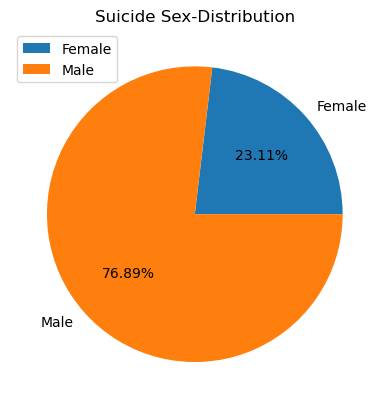

In [10]:
sex_distribution = df_.groupby(["sex"]).agg({"suicides_no":"sum"}).reset_index()
plt.pie(sex_distribution["suicides_no"].values, labels=["Female", "Male"], autopct="%.2f%%")
plt.title("Suicide Sex-Distribution")
plt.legend()
plt.show()

- Clearly, very high amount of suicides are attempted by male in comparison to female.

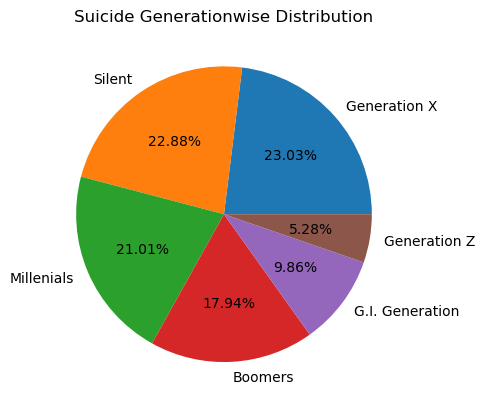

In [11]:
plt.pie(df_["generation"].value_counts().values,labels = df_["generation"].value_counts().index.tolist(), autopct="%.2f%%")
plt.title("Suicide Generationwise Distribution")
plt.show()

In [12]:
num_of_countries_by_year = df_.groupby(["year"]).agg({"country": "nunique"}).reset_index()

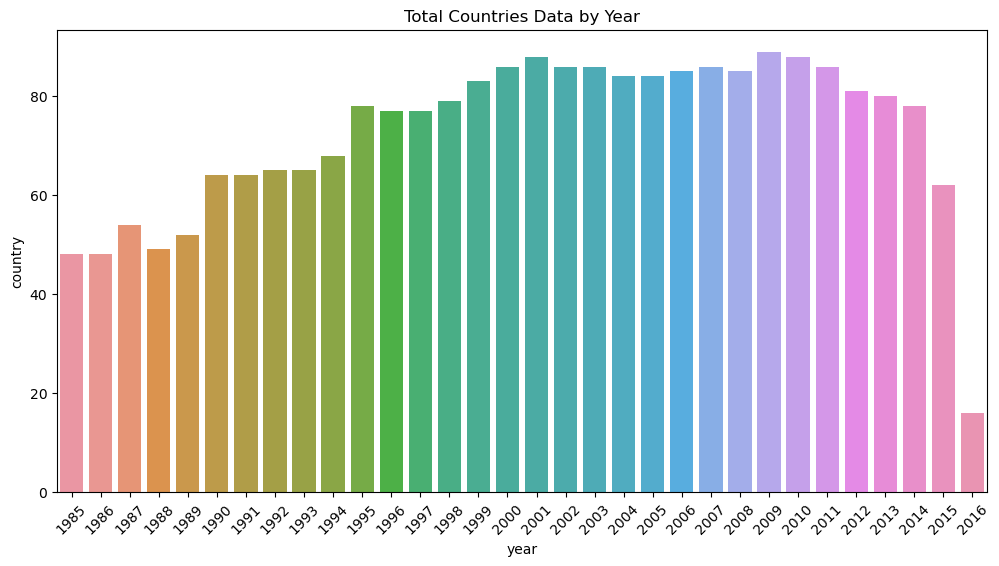

In [13]:
plt.figure(figsize=(12, 6))
plt.xticks(rotation = 45)
sns.barplot(data=df_, x=num_of_countries_by_year["year"], y=num_of_countries_by_year["country"])
plt.title("Total Countries Data by Year")
plt.show()

- Number of countries, participating in data are varying over the period of different years.
- There are average of about 60 countries.

### Univariate Data Analysis

In [14]:
suicides_by_year = df_.groupby(["year"]).agg({"suicides_no": "sum"}).reset_index()

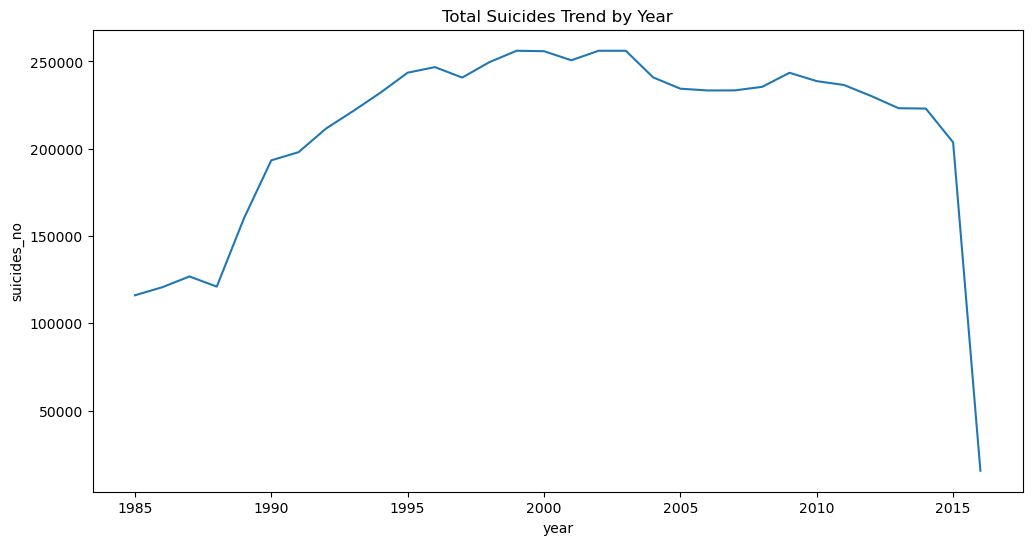

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_, x=suicides_by_year["year"], y=suicides_by_year["suicides_no"])
plt.title("Total Suicides Trend by Year")
plt.show()

- The global suicide trend overall has increased from 90's to 2000's.

In [16]:
suicides_by_age_sex= df_.groupby(["age", "sex"]).agg({"suicides_no": "sum"}).reset_index()

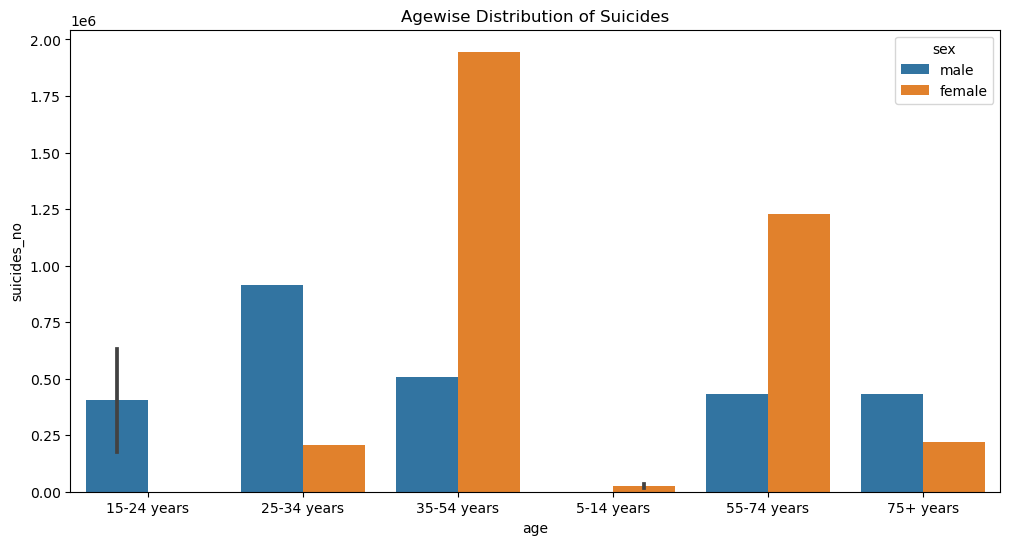

In [17]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_, x=suicides_by_age_sex["age"], y=suicides_by_age_sex["suicides_no"], hue="sex")
plt.title("Agewise Distribution of Suicides")
plt.show()

- More females committed suicide in two age groups as compared to males. Though, in a bigger picture, males have committed more suicides

In [18]:
suicides_by_gen_sex = df_.groupby(["generation", "sex"]).agg({"suicides_no": "sum"}).reset_index()

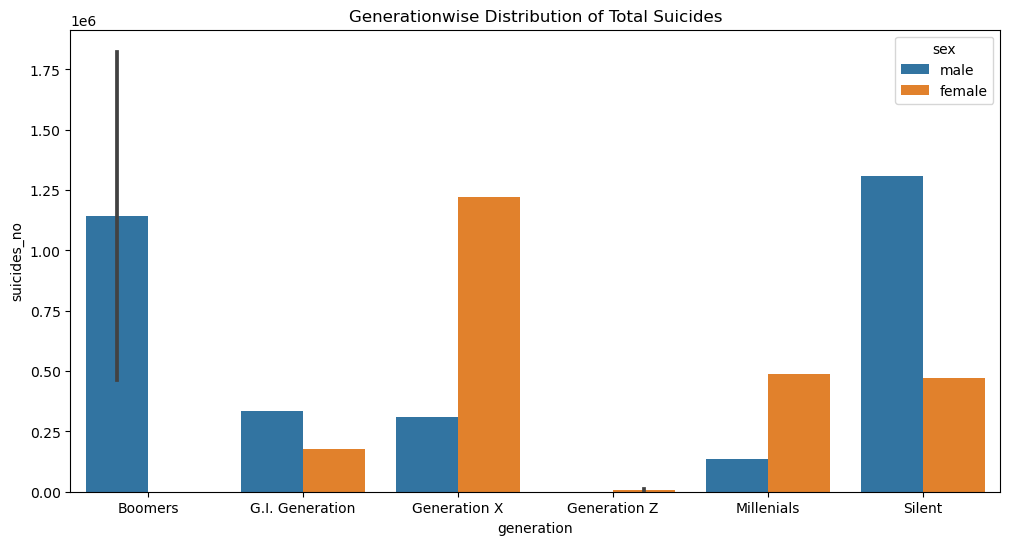

In [19]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_, x=suicides_by_gen_sex["generation"], y=suicides_by_gen_sex["suicides_no"], hue="sex")
plt.title("Generationwise Distribution of Total Suicides")
plt.show()

In [20]:
suicides_by_gen_age_sex = df_.groupby(["generation", "sex", "age"]).agg({"suicides_no": "sum"}).reset_index()

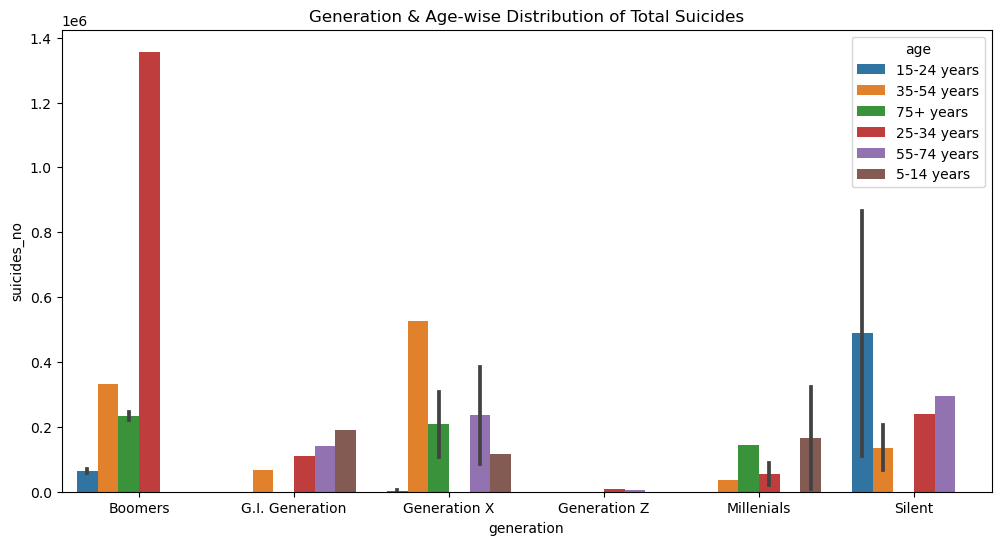

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_, x=suicides_by_gen_age_sex["generation"], y=suicides_by_gen_age_sex["suicides_no"], hue="age")
plt.title("Generation & Age-wise Distribution of Total Suicides")
plt.show()

In [22]:
suicidesper100k_by_year = df_.groupby(["year"]).agg({"suicides/100k pop": "mean", "country":"unique"}).reset_index()

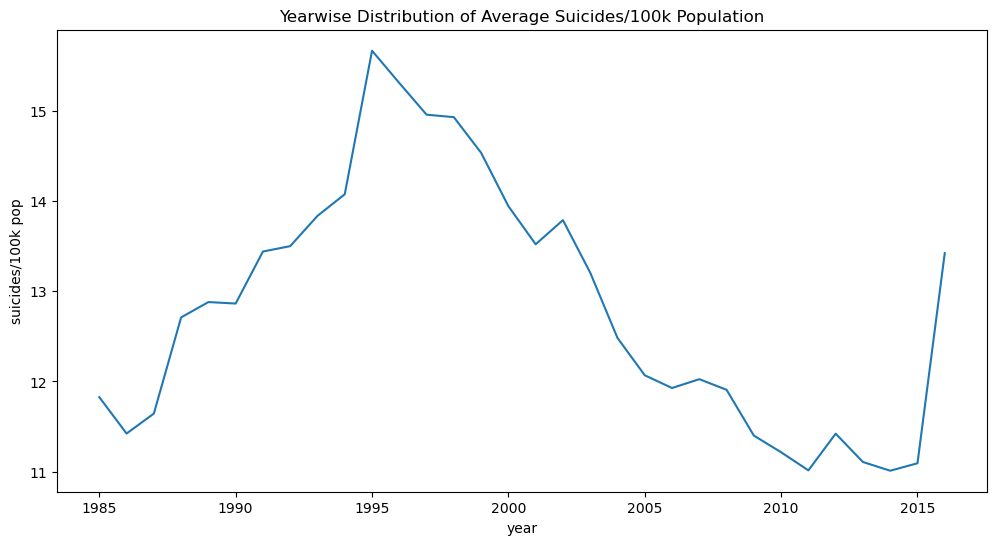

In [23]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_, x=suicidesper100k_by_year["year"], y=suicidesper100k_by_year["suicides/100k pop"])
plt.title("Yearwise Distribution of Average Suicides/100k Population")
plt.show()

- Total Suicides/100k Population peaked around 1996, after that a decreasing trend can be observed. 

In [24]:
suicidesper100k_by_sex = df_.groupby(["year","sex"]).agg({"suicides/100k pop": "mean", "country":"unique"}).reset_index()

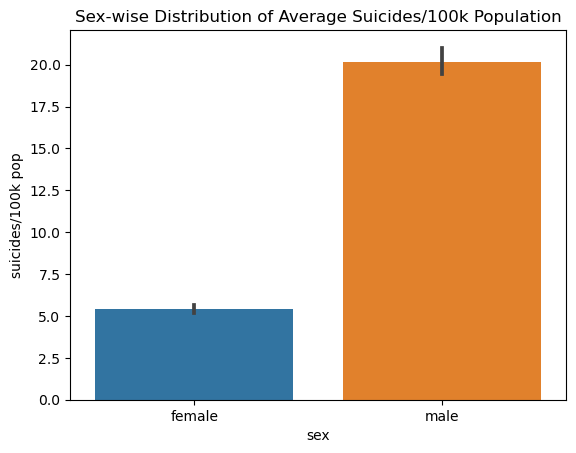

In [25]:

sns.barplot(data=df_, x=suicidesper100k_by_sex["sex"], y=suicidesper100k_by_sex["suicides/100k pop"])
plt.title("Sex-wise Distribution of Average Suicides/100k Population")
plt.show()

In [26]:
suicideper100k_by_year = df_.groupby(["age", "year"]).agg({"suicides/100k pop":"mean"}).reset_index()

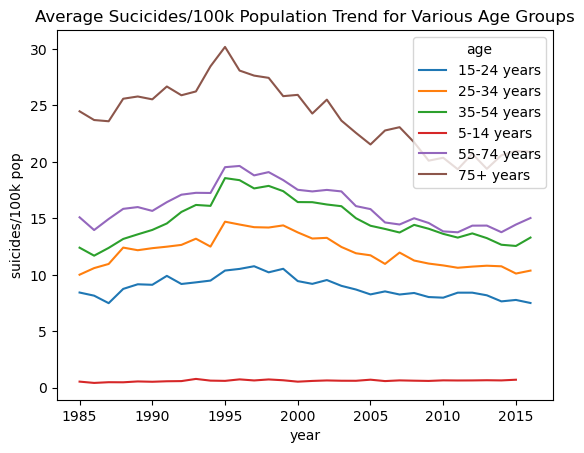

In [27]:
sns.lineplot(data=suicideper100k_by_year, x="year", y="suicides/100k pop", hue="age")
plt.title("Average Sucicides/100k Population Trend for Various Age Groups")
plt.show()

- Suicide Trend over the years has been quite similar for all age groups except the 5-14 years.
- For the people of age group 15 - 24, the trend has been quite dampening after year 2000, as compared to others.

### Bivariate Data Analysis

In [28]:
suicides_by_gdp = df_.groupby(["year", "country", "sex"]).agg({"suicides/100k pop":"mean", "gdp_per_capita ($)":"mean"}).reset_index()

In [29]:
suicides_by_gdp.head(2)

,year,country,sex,suicides/100k pop,gdp_per_capita ($)
0,1985,Antigua and Barbuda,female,0.0,3850.0
1,1985,Antigua and Barbuda,male,0.0,3850.0


In [30]:
filtered_gdp = suicides_by_gdp[suicides_by_gdp["gdp_per_capita ($)"]<80000]

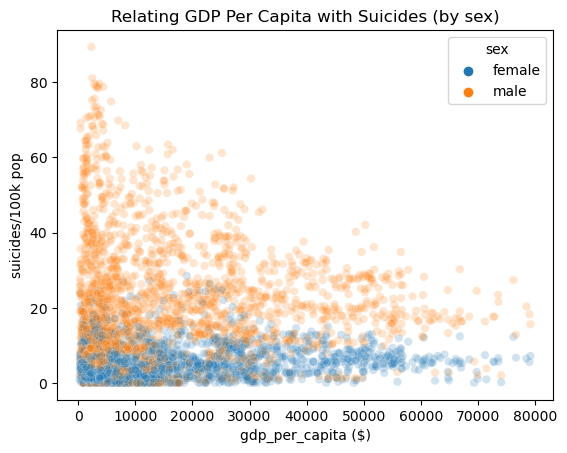

In [31]:
sns.scatterplot(x="gdp_per_capita ($)", y="suicides/100k pop", data=filtered_gdp, hue="sex", alpha=0.2)
plt.title("Relating GDP Per Capita with Suicides (by sex)")
plt.show()

- Suicides shows certain amount of negative correlation with per-capita income of the country.

In [32]:
suicides_by_gen_sex = df_.groupby(["sex", "generation"]).agg({"suicides/100k pop":"sum"}).reset_index()

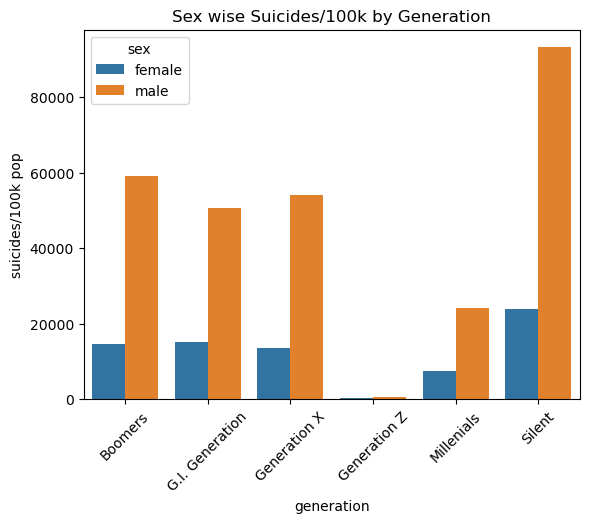

In [33]:
plt.title("Sex wise Suicides/100k by Generation")
plt.xticks(rotation=45)
sns.barplot(data=suicides_by_gen_sex, x="generation", y="suicides/100k pop", hue="sex")
plt.show()

- In all generations, males commits more suicides as compared to females.
- The ratio remains comparable for all generations, except the silent one.

Based on the analysis, some insights are written. Further from the charts, understanding the implicit relations more amount of complex insights are also understood about relation of suicides with per-capita income, sex, age-group and inter-relation between them.